<img src = "https://images2.imgbox.com/c1/79/4H1V1tSO_o.png" width="1200">

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
#leia o arquivo csv, tranforme em um DataFrame e armazene em uma variável (ttn):
ttn = pd.read_csv('datasets/train.csv')

## First Contact

In [5]:
#exibe as 5 primeiras linhas do df
ttn.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#exibe as últimas 7 linhas do df
ttn.tail(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.050,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.125,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.750,NaN,Q


## Summarization

In [7]:
#mostre o formato do dataset
ttn.shape

(891, 12)

In [8]:
#crie um sumário dos dados
ttn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
#obtenha uma descrição dos dados numéricos, arredondando em duas casas decimais
ttn.describe().round(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


In [37]:
#obtenha uma descrição dos dados categóricos
ttn.describe(include=np.object_)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,891
unique,891,2,681,147,3
top,"O'Sullivan, Miss. Bridget Mary",male,CA. 2343,G6,S
freq,1,577,7,4,644


## Valores nulos

In [11]:
#imprima um sumário dos números faltantes ou nulos
ttn.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
#exclua a coluna menos relevante através do dropna passando um threshold para não excluir a coluna Age
ttn.dropna(axis= 1, thresh=177, inplace=True)
ttn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
#selecione um dataset com a condição de que todos os valores possuem valores nulos na coluna Embarked
ttn[ttn['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [38]:
#construa um filtro com o mesmo perfil das linhas faltantes baseado nas colunas Survived, Pclass, Sex, Age
#use ['Embarked'].value_counts() para entender onde a maioria desse perfil embarcou

ttn.loc[(ttn['Survived'] == 1)&(ttn['Pclass'] == 1)&(ttn['Sex'] == 'female')&(ttn['Age'] > 37), 'Embarked'].value_counts()

C    20
S    14
Name: Embarked, dtype: int64

In [15]:
#subistitua pelo porto mais frequente e verifique se a alteração teve efeito
#lembre=se que o fillna possui o kwarg inplace=True
ttn['Embarked'].fillna('C', inplace=True)
ttn.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

## Imputação

In [16]:
#Antes
ttn['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [17]:
ttn[ttn["Age"].isna()]['Sex'].value_counts()

male      124
female     53
Name: Sex, dtype: int64

In [18]:
ttn[ttn["Age"].isna()]['Survived'].value_counts()

0    125
1     52
Name: Survived, dtype: int64

In [39]:
print('mediana de idade para sobreviventes masculino: ', ttn.loc[(ttn['Survived'] == 1)&(ttn['Sex']=='male'),'Age'].median())
print('mediana de idade para sobreviventes feminina: ', ttn.loc[(ttn['Survived'] == 1)&(ttn['Sex']=='female'),'Age'].median())

print('mediana de idade para não-sobreviventes masculino: ', ttn.loc[(ttn['Survived']==0)&(ttn['Sex']=='male'),'Age'].median())
print('mediana de idade para não-sobreviventes feminina: ', ttn.loc[(ttn['Survived']==0)&(ttn['Sex']=='female'),'Age'].median())

mediana de idade para sobreviventes masculino:  31.0
mediana de idade para sobreviventes feminina:  31.0
mediana de idade para não-sobreviventes masculino:  32.0
mediana de idade para não-sobreviventes feminina:  29.0


In [40]:
print('média de idade para sobreviventes masculino: ', ttn.loc[(ttn['Survived']==1)&(ttn['Sex']=='male'),'Age'].mean())
print('média de idade para sobreviventes feminina: ', ttn.loc[(ttn['Survived']==1)&(ttn['Sex']=='female'),'Age'].mean())

print('média de idade para não-sobreviventes masculino: ', ttn.loc[(ttn['Survived']==0)&(ttn['Sex']=='male'),'Age'].mean())
print('média de idade para não-sobreviventes feminina: ', ttn.loc[(ttn['Survived']==0)&(ttn['Sex']=='female'),'Age'].mean())

média de idade para sobreviventes masculino:  27.969449541284405
média de idade para sobreviventes feminina:  29.334763948497855
média de idade para não-sobreviventes masculino:  31.706196581196583
média de idade para não-sobreviventes feminina:  26.506172839506174


In [41]:
#Armazenando o valor desejado em uma variável: Mediana para os sobreviventes
male_surv_median = ttn.loc[(ttn['Survived'] == 1)&(ttn['Sex'] == 'male'),'Age'].median()

#Selecionar a coluna que vai receber os valores e especificar as condições = coluna.fillna(variável)
ttn['Age'][ttn['Survived'] == 1][ttn['Sex'] == 'male'] = ttn['Age'].fillna(male_surv_median);

female_surv_median = ttn.loc[(ttn['Survived'] == 1)&(ttn['Sex'] == 'female'),'Age'].median()
ttn['Age'][ttn['Survived'] == 1][ttn['Sex'] == 'female'] = ttn['Age'].fillna(female_surv_median);

#Armazenando o valor desejado em uma variável: Média para os não sobreviventes
male_non_surv_median = round(ttn.loc[(ttn['Survived'] == 0)&(ttn['Sex'] == 'male'),'Age'].mean())
ttn['Age'][ttn['Survived'] == 0][ttn['Sex'] == 'male'] = ttn['Age'].fillna(male_non_surv_median, inplace=True);

female_non_surv_median = round(ttn.loc[(ttn['Survived'] == 0)&(ttn['Sex'] == 'female'),'Age'].mean())
ttn['Age'][ttn['Survived'] == 0][ttn['Sex'] == 'female'] = ttn['Age'].fillna(female_non_surv_median, inplace=True);

In [42]:
#Depois
ttn['Age'].describe()

count    891.000000
mean      30.156195
std       13.034420
min        0.420000
25%       22.000000
50%       32.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

## Agrupamentos e seleções

In [43]:
# Selecionar as colunas do dataset :: selecionar as colunas para agrupar :: passar as formas de agregar os valores
ttn[['Survived', 'Pclass', 'Age']].groupby(['Survived','Pclass']).agg(['min','mean', 'median','max']).round()

Age                   
                  min  mean median   max
Survived Pclass                         
0        1        2.0  41.0   38.0  71.0
         2       16.0  33.0   32.0  70.0
         3        1.0  28.0   31.0  74.0
1        1        1.0  35.0   34.0  80.0
         2        1.0  26.0   28.0  62.0
         3        0.0  24.0   27.0  63.0

In [24]:
#vamos criar faixas etárias no nossos dados  
age_cat_edges = [0, 3, 12, 18, 35, 60, 1000]
ttn['age_cat'] = pd.cut(ttn['Age'], 
                             age_cat_edges, 
                             labels=['Babies','Children','Teen',
                                     'Adult','MidAge','Senior'])

In [25]:
pd.pivot_table(ttn, values=['Survived'], 
                    index=['Sex', 'age_cat'], columns=['Pclass'],
                    aggfunc='count', margins=True)

Survived               
Pclass                 1    2    3  All
Sex    age_cat                         
female Babies          1    2    9   12
       Children        0    6   14   20
       Teen           10    6   20   36
       Adult          45   42   86  173
       MidAge         36   20   14   70
       Senior          2    0    1    3
male   Babies          1    8    9   18
       Children        2    1   16   19
       Teen            2    6   26   34
       Adult          51   63  248  362
       MidAge         54   27   44  125
       Senior         12    3    4   19
All                  216  184  491  891

In [26]:
pd.crosstab(index=[ttn['Pclass']], columns = [ttn['Sex'], ttn['age_cat']], 
            normalize=True).T

Pclass                  1         2         3
Sex    age_cat                               
female Babies    0.001122  0.002245  0.010101
       Children  0.000000  0.006734  0.015713
       Teen      0.011223  0.006734  0.022447
       Adult     0.050505  0.047138  0.096521
       MidAge    0.040404  0.022447  0.015713
       Senior    0.002245  0.000000  0.001122
male   Babies    0.001122  0.008979  0.010101
       Children  0.002245  0.001122  0.017957
       Teen      0.002245  0.006734  0.029181
       Adult     0.057239  0.070707  0.278339
       MidAge    0.060606  0.030303  0.049383
       Senior    0.013468  0.003367  0.004489

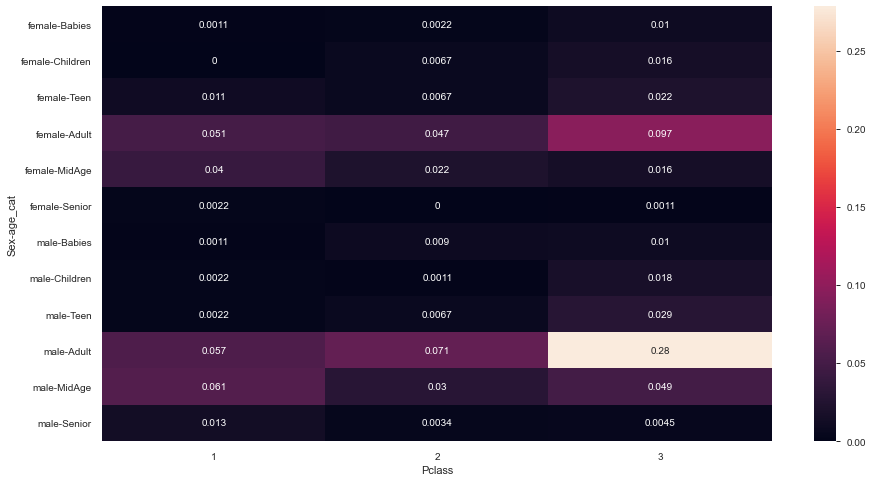

In [44]:
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(pd.crosstab( index= [ttn['Pclass']], 
                        columns = [ttn['Sex'], ttn['age_cat']], normalize=True).T, 
            annot=True)
plt.show()

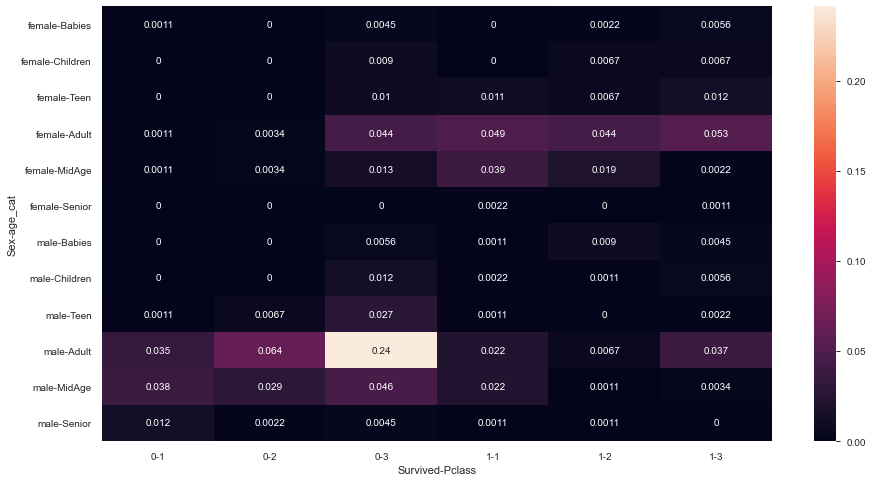

In [45]:
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(pd.crosstab( index= [ttn['Survived'], ttn['Pclass']], 
                        columns = [ttn['Sex'], ttn['age_cat']], normalize=True).T, 
            annot=True) # para evitar notação científica, usar fmt='g'
plt.show()

## Relações e distribuições

<Figure size 432x288 with 0 Axes>

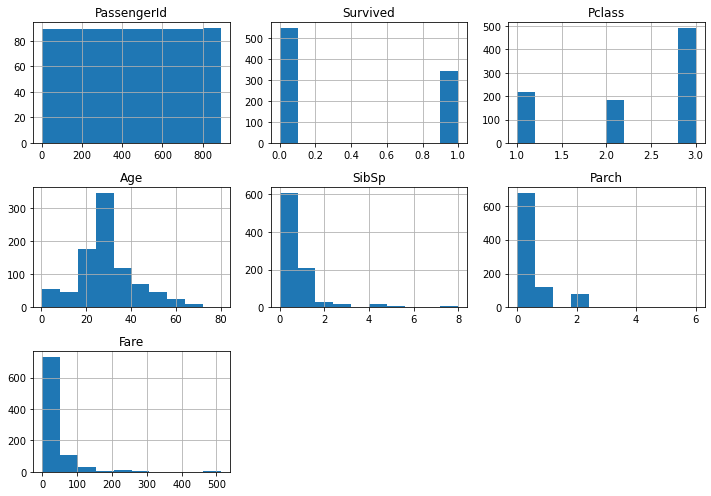

In [29]:
plt.clf()
ttn.hist(figsize=(10,7)) 
plt.tight_layout()
plt.show()

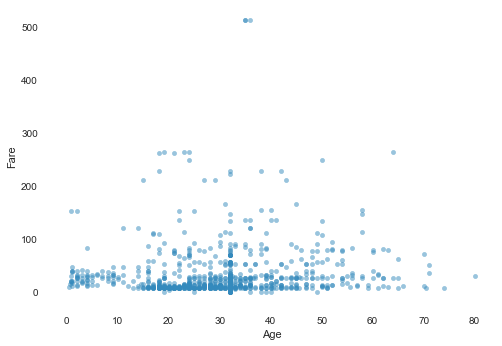

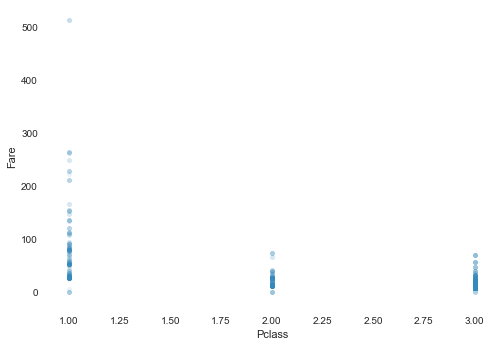

In [46]:
ttn.plot('Age', 'Fare', kind='scatter', alpha=0.5)
ttn.plot('Pclass', 'Fare', kind='scatter', alpha=0.1)
plt.show()

## Correlações

In [31]:
ttn.corr().round(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.00,-0.01,-0.04,0.03,-0.06,-0.00,0.01
Survived,-0.01,1.00,-0.34,-0.08,-0.04,0.08,0.26
Pclass,-0.04,-0.34,1.00,-0.32,0.08,0.02,-0.55
Age,0.03,-0.08,-0.32,1.00,-0.23,-0.19,0.08
SibSp,-0.06,-0.04,0.08,-0.23,1.00,0.41,0.16
Parch,-0.00,0.08,0.02,-0.19,0.41,1.00,0.22
Fare,0.01,0.26,-0.55,0.08,0.16,0.22,1.00


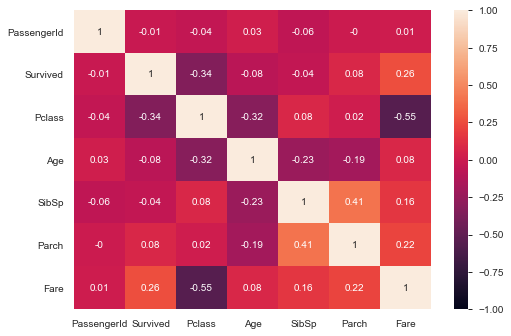

In [47]:
sns.heatmap(ttn.corr().round(2), annot=True, vmin=-1, vmax=1 )
plt.show()

## PairPlot

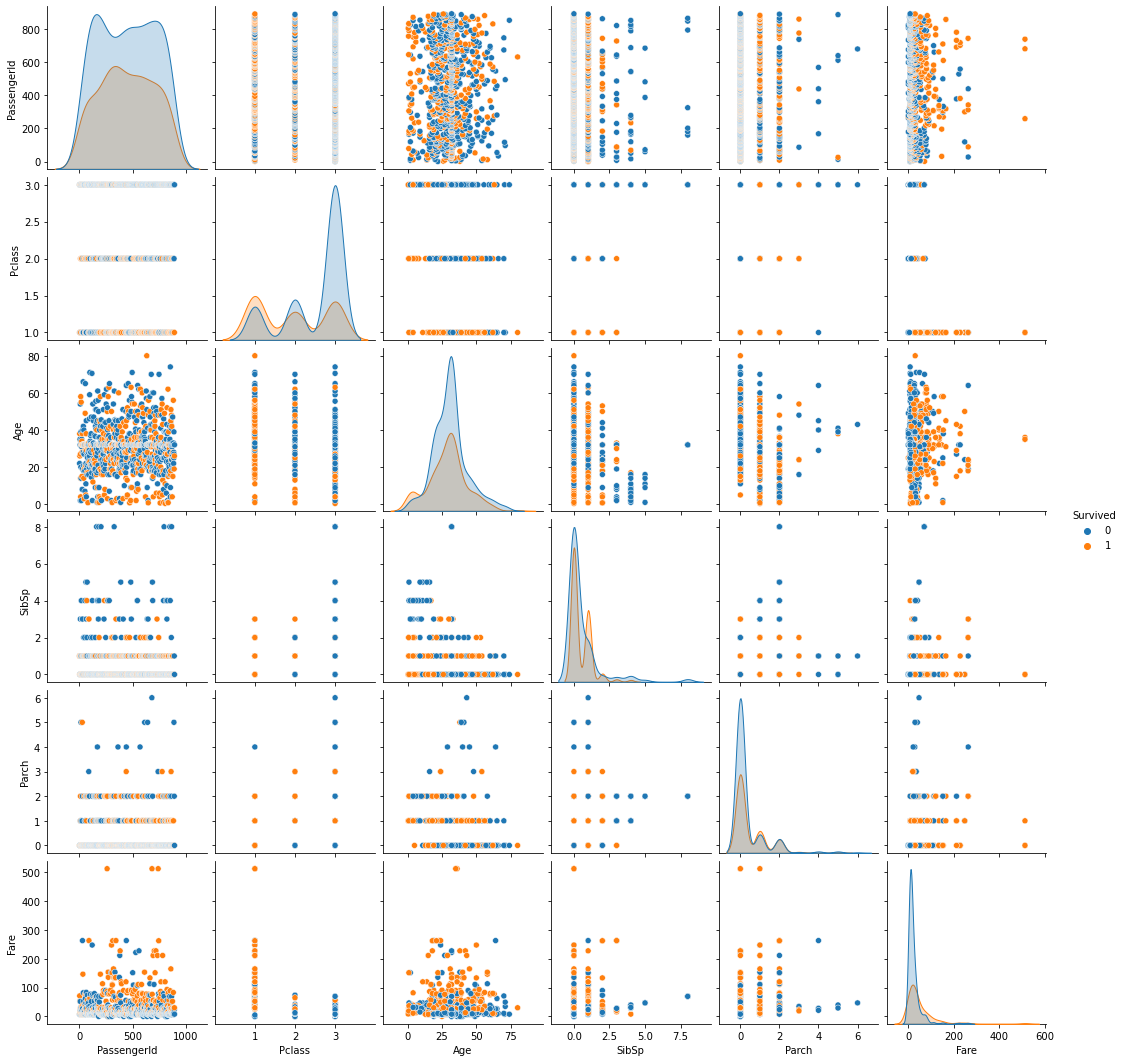

In [33]:
sns_plot= sns.pairplot(ttn, hue='Survived', diag_kind='kde')

In [48]:
#Para salvar a figura em png
sns_plot.savefig("files/ttn_snspairplot_kde.png")

## Pandas Profiling

In [49]:
%pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [53]:
from pandas_profiling import ProfileReport

In [55]:
profile = ProfileReport(ttn, title='Titanic Dataset')

In [56]:
profile.to_file("files/Titanic_Final")

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\dsc70\anaconda3\lib\site-packages\pandas_profiling\visualisation\plot.py:154: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdBu"))
  cmap.set_bad(cmap_bad)


Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\dsc70\anaconda3\lib\site-packages\pandas_profiling\profile_report.py:250: UserWarning: Extension  not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]